In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, pearsonr, chi2_contingency, f_oneway, spearmanr
from sklearn.preprocessing import LabelEncoder

donnees= pd.read_csv('./archive/Loan.csv')
donnees.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


Suppression des colonnes(suppression par intuition).
Remarque : on va supprimer AnnualIncome car on a déjà MonthlyIncome

In [73]:
donnees = donnees.drop(['ApplicationDate','MaritalStatus','LoanPurpose','EducationLevel','AnnualIncome'],axis=1)

In [74]:
# Supposons que df soit votre DataFrame et loanapproved votre colonne binaire
num_cols = donnees.select_dtypes(include='number').columns

correlations = {}
for col in num_cols:
    if col != 'risk_score':  # Ignorer si c'est la colonne du score de risque
        corr, p_value = pointbiserialr(donnees['LoanApproved'], donnees[col])
        correlations[col] = {'correlation': corr, 'p_value': p_value}

print(pd.DataFrame(correlations).T)


                            correlation        p_value
Age                            0.141029   2.302532e-89
CreditScore                    0.142000   1.381666e-90
Experience                     0.140755   5.062367e-89
LoanAmount                    -0.239496  7.325162e-259
LoanDuration                  -0.094558   5.904813e-41
NumberOfDependents             0.001717   8.081220e-01
MonthlyDebtPayments           -0.070415   2.064320e-23
CreditCardUtilizationRate     -0.010466   1.388570e-01
NumberOfOpenCreditLines       -0.004769   5.000995e-01
NumberOfCreditInquiries       -0.005885   4.052876e-01
DebtToIncomeRatio              0.000034   9.961342e-01
BankruptcyHistory             -0.070751   1.275268e-23
PreviousLoanDefaults          -0.065343   2.240870e-20
PaymentHistory                 0.030804   1.317633e-05
LengthOfCreditHistory          0.105949   5.045309e-51
SavingsAccountBalance          0.000961   8.918803e-01
CheckingAccountBalance         0.000660   9.256530e-01
TotalAsset

Conclusion : colonnes candidates à la suppression sont:

- NumberOfDependents (corrélation = 0.0017)
- CreditCardUtilizationRate (corrélation = -0.010)
- NumberOfOpenCreditLines (corrélation = -0.0047)
- NumberOfCreditInquiries (corrélation = -0.0059)
- DebtToIncomeRatio (corrélation = 0.000034)
- SavingsAccountBalance (corrélation = 0.00096)
- CheckingAccountBalance (corrélation = 0.00066)
- UtilityBillsPaymentHistory (corrélation = 0.0033)
- JobTenure (corrélation = 0.0049)

Ces colonnes n'ont pas une relation statistiquement significative avec LoanApproved

In [75]:
correlations_risk = {}
for col in num_cols:
    if col != 'loanapproved':  # Ignorer si c'est la colonne binaire
        corr, p_value = pearsonr(donnees['RiskScore'], donnees[col])
        correlations_risk[col] = {'correlation': corr, 'p_value': p_value}

print(pd.DataFrame(correlations_risk).T)


                            correlation        p_value
Age                           -0.164304  4.943609e-121
CreditScore                   -0.240198  2.044732e-260
Experience                    -0.166496  2.819581e-124
LoanAmount                     0.137981   1.373319e-85
LoanDuration                   0.054550   1.164751e-14
NumberOfDependents             0.001686   8.115018e-01
MonthlyDebtPayments            0.036938   1.738976e-07
CreditCardUtilizationRate      0.108758   1.101824e-53
NumberOfOpenCreditLines        0.007762   2.723508e-01
NumberOfCreditInquiries        0.003103   6.608393e-01
DebtToIncomeRatio              0.326500   0.000000e+00
BankruptcyHistory              0.377578   0.000000e+00
PreviousLoanDefaults           0.258659  4.267532e-303
PaymentHistory                -0.016992   1.626134e-02
LengthOfCreditHistory         -0.177796  1.028336e-141
SavingsAccountBalance          0.002190   7.567712e-01
CheckingAccountBalance        -0.004044   5.674186e-01
TotalAsset

Conclusion: colonnes candidates à la suppression sont:

- NumberOfDependents : 0.0017
- NumberOfOpenCreditLines : 0.0077
- NumberOfCreditInquiries : 0.0031
- SavingsAccountBalance : 0.0022
- CheckingAccountBalance : -0.0040
- UtilityBillsPaymentHistory : -0.0052
- JobTenure : -0.0044

Ces colonnes n'ont pas une relation statistiquement significative avec RiskScore

La suppression de l'union des colonnes candidates 
- NumberOfDependents
- NumberOfOpenCreditLines
- NumberOfCreditInquiries 
- SavingsAccountBalance
- CheckingAccountBalance
- UtilityBillsPaymentHistory
- JobTenure 
- CreditCardUtilizationRate
- DebtToIncomeRatio

In [76]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'NumberOfDependents', 
    'NumberOfOpenCreditLines', 
    'NumberOfCreditInquiries', 
    'SavingsAccountBalance', 
    'CheckingAccountBalance', 
    'UtilityBillsPaymentHistory', 
    'JobTenure', 
    'CreditCardUtilizationRate', 
    'DebtToIncomeRatio'
]

# Suppression des colonnes du donnees
df = donnees.drop(columns=colonnes_a_supprimer,axis=1)


In [77]:
# Instancier un encodeur
label_encoder = LabelEncoder()

# Identifier toutes les colonnes catégorielles (non numériques)
colonnes_a_encoder = df.select_dtypes(include=['object', 'category']).columns

# Appliquer l'encodeur à chaque colonne
for col in colonnes_a_encoder:
    df[col] = label_encoder.fit_transform(df[col])


,Age,CreditScore,EmploymentStatus,Experience,LoanAmount,LoanDuration,HomeOwnershipStatus,MonthlyDebtPayments,BankruptcyHistory,PreviousLoanDefaults,...,TotalAssets,TotalLiabilities,MonthlyIncome,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,617,0,22,13152,48,2,183,0,0,...,146111,19183,3329.000000,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,628,0,15,26045,48,0,496,0,0,...,53204,9595,3309.083333,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,570,0,26,17627,36,3,902,0,0,...,25176,128874,3393.666667,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,545,0,34,37898,96,0,755,0,0,...,104822,5370,5757.000000,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,594,0,17,9184,36,0,274,0,0,...,244305,17286,8605.333333,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,587,0,19,24521,36,3,673,0,0,...,80969,25642,2515.000000,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,56,567,0,33,25818,36,3,414,0,0,...,69571,5569,4103.833333,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,44,645,0,20,37033,72,0,512,0,0,...,108316,4653,4079.833333,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,60,560,0,36,14760,72,2,986,0,0,...,22085,11485,3418.750000,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


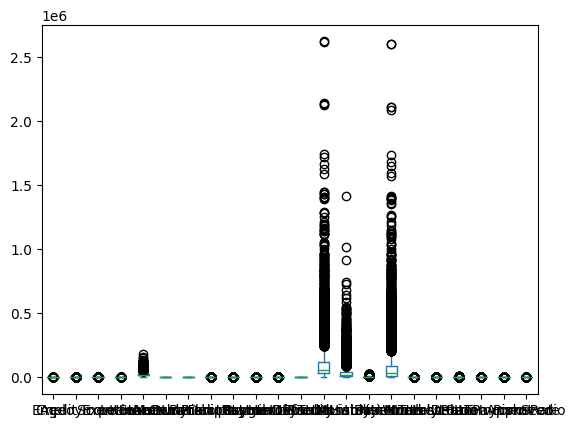

In [78]:
df.plot.box()
df

In [79]:
import pandas as pd
import numpy as np

# Supposons que df est votre DataFrame
# Étape 1 : Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Étape 2 : Identifier les colonnes à supprimer
threshold = 0.8  # Seuil de corrélation
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

# Supprimer les colonnes identifiées
print(to_drop)
df_reduced = df.drop(columns=to_drop)

# Afficher les colonnes restantes
print("Colonnes après réduction :", df_reduced.columns.tolist())


{'NetWorth', 'InterestRate', 'Experience'}
Colonnes après réduction : ['Age', 'CreditScore', 'EmploymentStatus', 'LoanAmount', 'LoanDuration', 'HomeOwnershipStatus', 'MonthlyDebtPayments', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'BaseInterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']


In [80]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree

# Supposons que df_reduced est votre DataFrame après le prétraitement
# Étape 1 : Séparer les caractéristiques (X) et les variables cibles (y)
X = df_reduced.drop(['LoanApproved', 'RiskScore'], axis=1)  # Caractéristiques
y_classification = df_reduced['LoanApproved']  # Variable cible pour la classification
y_regression = df_reduced['RiskScore']  # Variable cible pour la régression

# Étape 2 : Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Étape 3 : Créer et entraîner l'arbre de décision pour la classification
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train_class)

# Étape 4 : Faire des prédictions sur l'ensemble de test pour la classification
y_pred_class = dt_classifier.predict(X_test)

# Étape 5 : Évaluer le modèle de classification
accuracy = accuracy_score(y_test_class, y_pred_class)  # Calculer la précision
print("Accuracy (Classification):", accuracy)  # Afficher la précision
print(classification_report(y_test_class, y_pred_class))  # Afficher le rapport de classification
print("Confusion Matrix (Classification):\n", confusion_matrix(y_test_class, y_pred_class))  # Afficher la matrice de confusion

# Étape 6 : Visualiser l'arbre de décision pour la classification
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Not Approved', 'Approved'])
plt.title("Visualisation de l'Arbre de Décision (Classification)")  # Titre du graphique
plt.show()  # Afficher le graphique

# Étape 7 : Créer et entraîner l'arbre de décision pour la régression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train_reg)

# Étape 8 : Faire des prédictions sur l'ensemble de test pour la régression
y_pred_reg = dt_regressor.predict(X_test)

# Étape 9 : Évaluer le modèle de régression
mse = mean_squared_error(y_test_reg, y_pred_reg)  # Calculer l'erreur quadratique moyenne
print("Mean Squared Error (Regression):", mse)  # Afficher l'erreur

# Visualisation de l'arbre de décision pour la régression (facultatif)
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_regressor, filled=True, feature_names=X.columns)
plt.title("Visualisation de l'Arbre de Décision (Régression)")  # Titre du graphique
plt.show()  # Afficher le graphique


Accuracy (Classification): 0.87175
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2983
           1       0.76      0.72      0.74      1017

    accuracy                           0.87      4000
   macro avg       0.83      0.82      0.83      4000
weighted avg       0.87      0.87      0.87      4000

Confusion Matrix (Classification):
 [[2754  229]
 [ 284  733]]


In [68]:
import pandas as pd

# Exemple de données pour le test
data_test = {
    'Age': [28, 35, 45, 50, 23],
    'CreditScore': [720, 680, 750, 600, 790],
    'EmploymentStatus': [1, 0, 1, 0, 1],  # 1 = Employé, 0 = Chômeur
    'LoanAmount': [20000, 15000, 30000, 10000, 25000],
    'LoanDuration': [24, 36, 48, 12, 60],  # Durée en mois
    'HomeOwnershipStatus': [1, 0, 1, 0, 1],  # 1 = Propriétaire, 0 = Locataire
    'MonthlyDebtPayments': [500, 400, 700, 300, 600],
    'BankruptcyHistory': [0, 1, 0, 1, 0],  # 0 = Non, 1 = Oui
    'PreviousLoanDefaults': [0, 1, 0, 0, 1],  # 0 = Non, 1 = Oui
    'PaymentHistory': [1, 0, 1, 0, 1],  # 1 = Bon, 0 = Mauvais
    'LengthOfCreditHistory': [7, 10, 15, 3, 20],  # En années
    'TotalAssets': [30000, 15000, 50000, 20000, 35000],
    'TotalLiabilities': [10000, 8000, 20000, 5000, 12000],
    'MonthlyIncome': [4000, 3000, 6000, 2500, 7000],
    'BaseInterestRate': [3.5, 4.0, 3.0, 5.0, 2.8],  # Taux d'intérêt de base
    'MonthlyLoanPayment': [700, 600, 900, 300, 800],
    'TotalDebtToIncomeRatio': [0.25, 0.30, 0.35, 0.20, 0.40]  # Ratio
}

# Création du DataFrame
df_test = pd.DataFrame(data_test)

# Afficher l'échantillon de données
print(df_test)

# Faire des prédictions avec le modèle
predictions = dt_classifier.predict(df_test)

# Ajouter les prédictions au DataFrame d'échantillon
df_test['Predicted_LoanApproved'] = predictions

# Afficher les résultats
print(df_test[['LoanAmount', 'Predicted_LoanApproved']])


   Age  CreditScore  EmploymentStatus  LoanAmount  LoanDuration  \
0   28          720                 1       20000            24   
1   35          680                 0       15000            36   
2   45          750                 1       30000            48   
3   50          600                 0       10000            12   
4   23          790                 1       25000            60   

   HomeOwnershipStatus  MonthlyDebtPayments  BankruptcyHistory  \
0                    1                  500                  0   
1                    0                  400                  1   
2                    1                  700                  0   
3                    0                  300                  1   
4                    1                  600                  0   

   PreviousLoanDefaults  PaymentHistory  LengthOfCreditHistory  TotalAssets  \
0                     0               1                      7        30000   
1                     1               0   

In [71]:
print(df_test['Predicted_LoanApproved'])

0    1
1    0
2    0
3    1
4    1
Name: Predicted_LoanApproved, dtype: int64


In [ ]:
import joblib 
joblib.dump(dt_classifier, 'model_filtered_classification.pkl')
joblib.dump(dt_regressor, 'regressor.pkl')

print("Modèles enregistrés avec succès.")